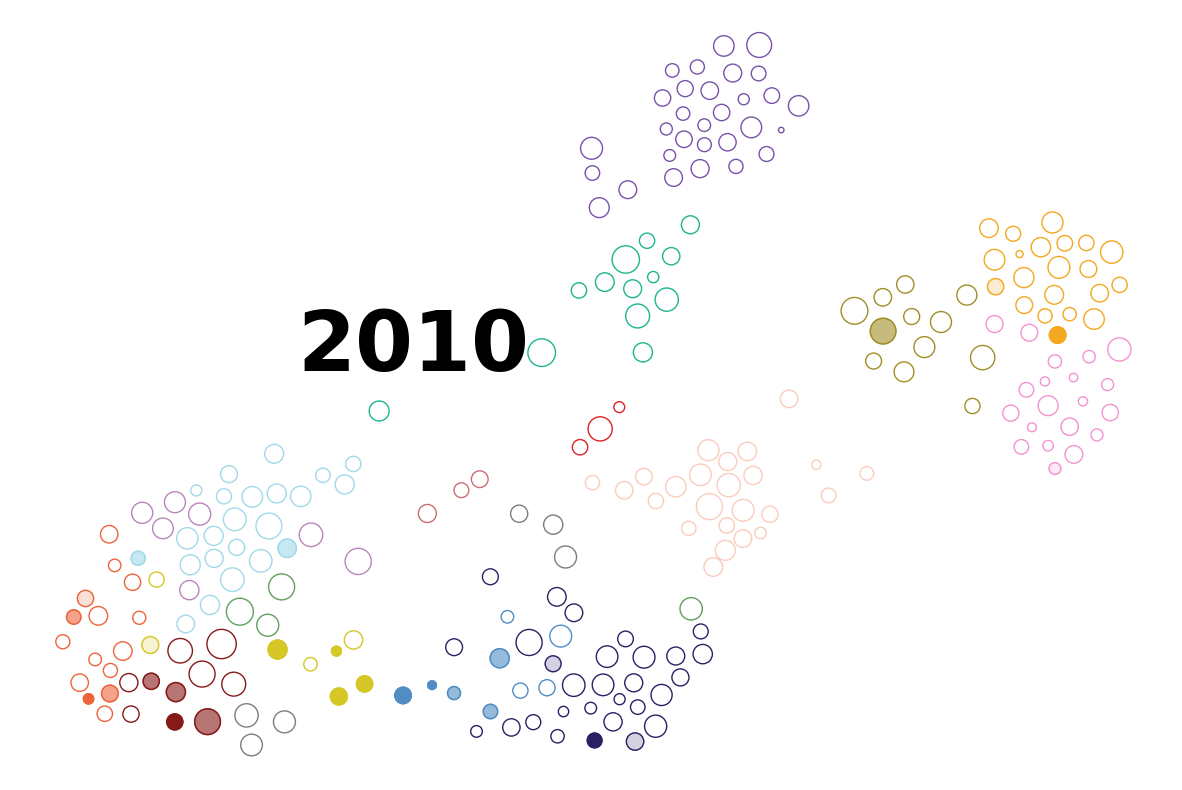

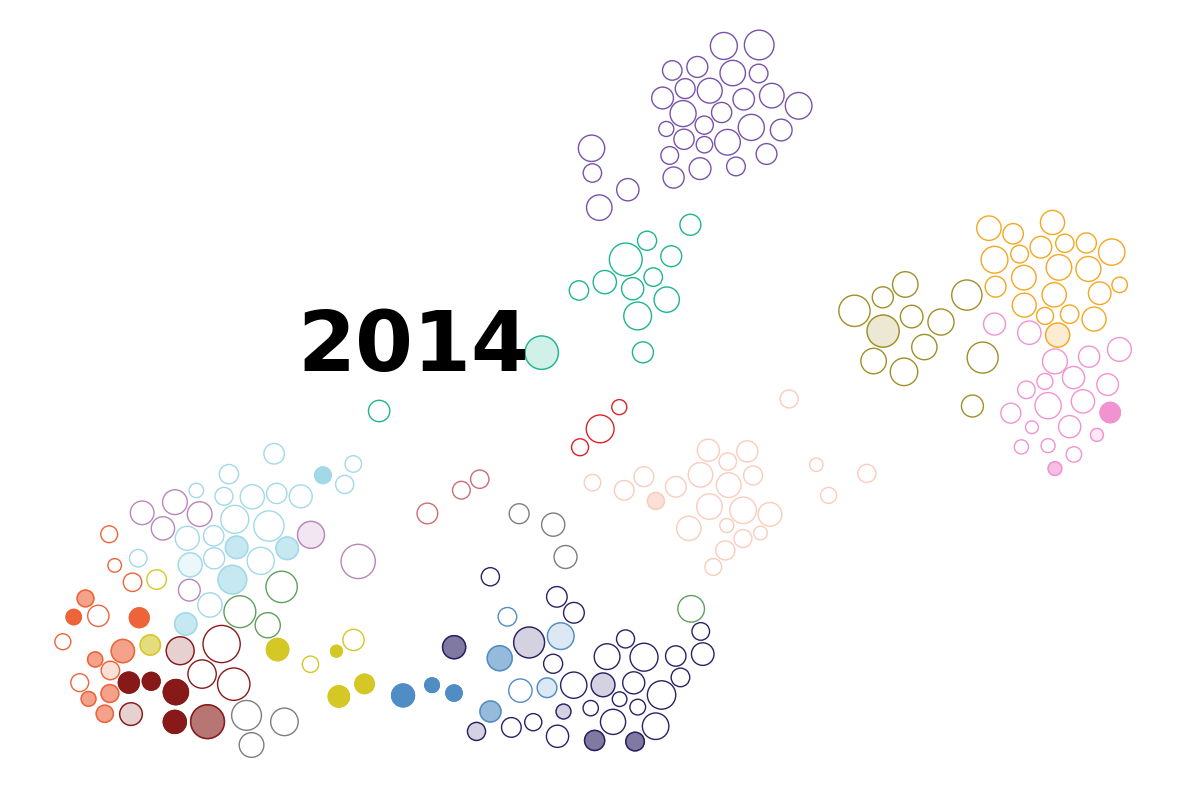

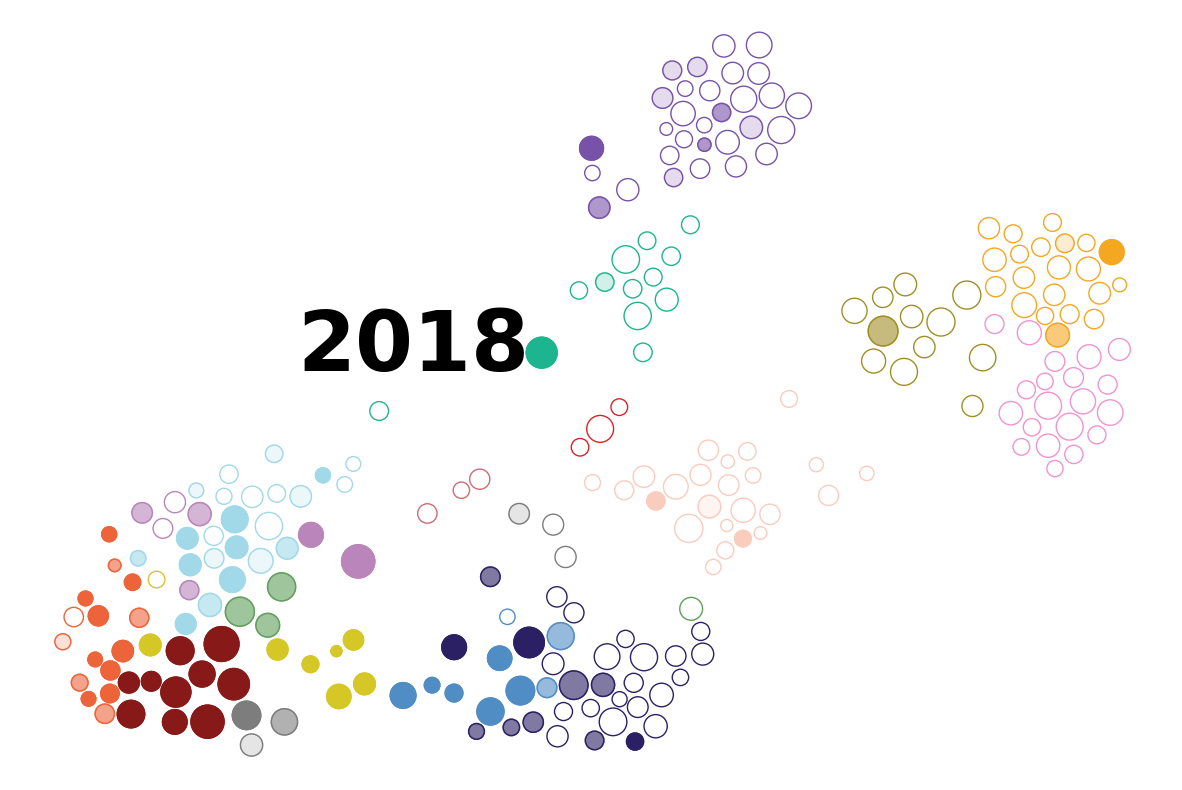

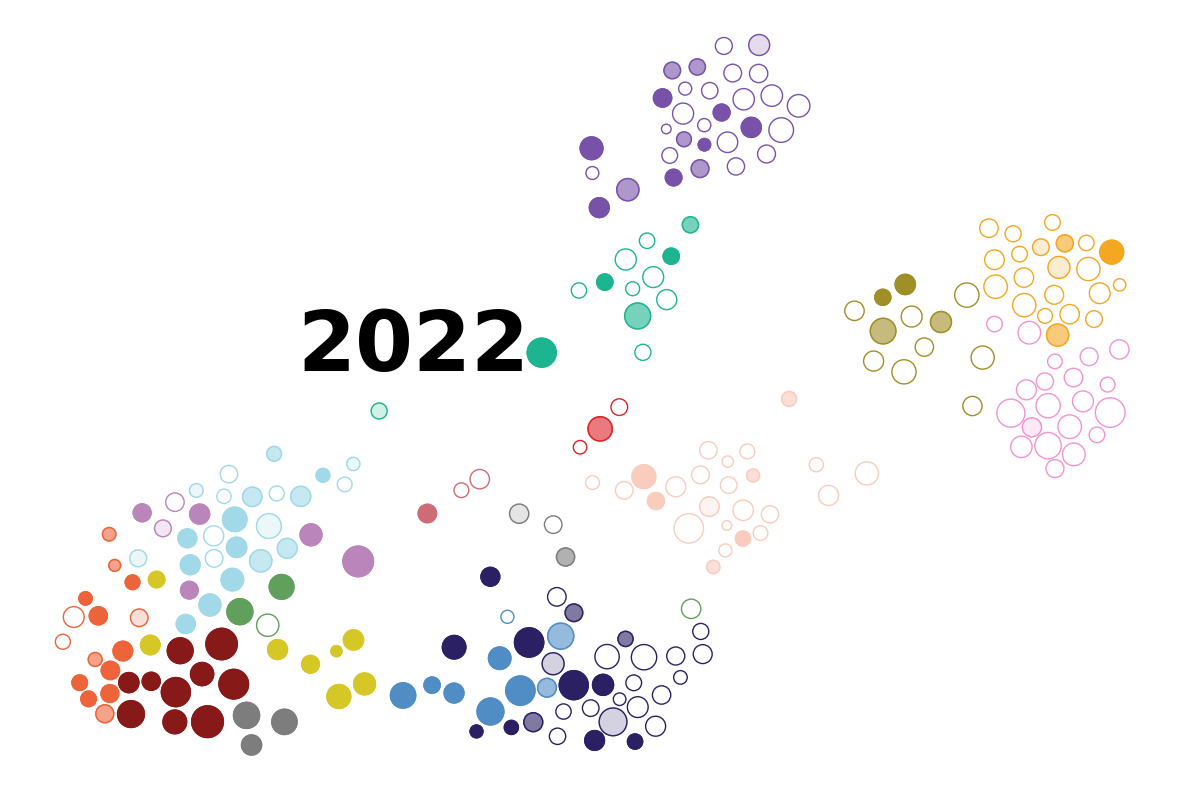

In [1]:
import importlib
from pickle_file import load_obj

data_path = 'data_processing/data_files/task_space_data/'
data_path_save = data_path + 'obj_tag_question_bipartite_core_space/'


df_task_space = load_obj('umapdf_DBSCAN2_level1_user_count', data_path_save + 'task_space_draw/')
df_cluster_adjusted = load_obj('cluster_conclusion_adjusted', data_path_save + 'task_space_draw/')

color_yyahn = ['#e33831', '#f7ad30', '#8dc53e', '#cab6d9', '#08b07f', 
            '#f2a794', '#ed643a', '#871918', '#a1d9e8', '#b985ba', 
            '#d5c726', '#508dc4', '#2b2064', '#7d7d7d', '#7852A9', 
            '#1db58f', '#faccbd', '#dc2227', '#609f5c', '#cd6c74', 
            '#f293d1', '#f4a720', '#a08f27']

df_task_space['yyahn_c'] = [color_yyahn[22-t] for t in df_task_space.cluster_inc_all]
df_cluster_adjusted['yyahn_c'] = [color_yyahn[22-t] for t in df_cluster_adjusted.cluster]


level = 1

programming_language_std_adjusted = load_obj('programming_language_std_adjusted', data_path_save)
L_dict = {l:i for i,l in enumerate(programming_language_std_adjusted)}
community_list_core_std = load_obj(f"community_list_std_core_cut_level{level}", data_path_save + 'networks/probability/')
C_dict = {c:i for i,c in enumerate(community_list_core_std)}
community_core_level = load_obj(f"community_core_with_cut_level{level}", data_path_save + 'networks/probability/')

tag_community_dict = {}
for i,c in community_core_level.items():
    for t in c:
        tag_community_dict[t] = i

import matplotlib.pyplot as plt

from collections import defaultdict
import numpy as np
tl_periods = [[2010], [2014],[2018],[2022]]

color_yyahn = ['#e33831', '#f7ad30', '#8dc53e', '#cab6d9', '#08b07f', '#f2a794', '#ed643a', '#871918', '#a1d9e8', '#b985ba', '#d5c726', '#508dc4', '#2b2064', '#7d7d7d', '#7852A9', '#1db58f', '#faccbd', '#dc2227', '#609f5c', '#cd6c74', '#f293d1', '#f4a720', '#a08f27']

df_task_space['yyahn_c'] = [color_yyahn[22-t] for t in df_task_space.cluster_inc_all]

for tlp in tl_periods:
    task_user_set_all = defaultdict(set)
    for yr in tlp:
        task_user_set = load_obj(f'task_user_set_{yr}_level_{level}', data_path_save + 'vote_regression_together/user_c_l_list/')
        for u, tsl in task_user_set.items():
            for t in tsl:
                task_user_set_all[t].add(u)

    task_user_count = {t:len(ul) for t, ul in task_user_set_all.items()}
    task_size_list = [np.sqrt(task_user_count[t[10:]]) * 3.5 for t in df_task_space.occ_code]

    python_user_set_all = defaultdict(set)
    tl_uc_matrix = load_obj(f'answer_task_language_user_count_matrix_with_merge_{tlp}_level_{level}', data_path_save + f'task_language_nestedness/tl_matrix/')
    python_in_task_rank = {}
    for t in community_list_core_std:
        if tl_uc_matrix[C_dict[t],L_dict['python']] > 0:
            python_in_task_rank[t] = np.where(np.argsort(-tl_uc_matrix[C_dict[t],:]) == L_dict['python'])[0][0] + 1

        else:
            python_in_task_rank[t] = -1

    alpha_dict = {}
    task_temp = []
    for t,r in python_in_task_rank.items():
        if r < 0:
            alpha_dict[t] = 0.0
        
        elif r == 1:
            alpha_dict[t] = 1
        elif r == 2:
            alpha_dict[t] = 0.6
        elif r == 3:
            alpha_dict[t] = 0.2
        
        else:
            task_temp.append(t)

    
    original_list = [-python_in_task_rank[t] for t in task_temp]
    tuned_min = 0.0
    tuned_max = 0.0
    
    a_linear = (tuned_max - tuned_min) /(max(original_list) - min(original_list))
    b_linear = tuned_max - a_linear * max(original_list)
    adjust_list = [a_linear * s + b_linear for s in original_list]
    for t, a in zip(task_temp, adjust_list):
        alpha_dict[t] = a

    alpha_list = [alpha_dict[t[10:]] for t in df_task_space.occ_code]

    fig = plt.figure(figsize=(15,10))
    
    plt.scatter(x = df_task_space.adjusted_x, y = df_task_space.adjusted_y, s = task_size_list, c = df_task_space.yyahn_c, alpha=alpha_list)

    
    plt.scatter(x = df_task_space.adjusted_x, y = df_task_space.adjusted_y, s=task_size_list,c = 'none', edgecolors = df_task_space.yyahn_c, linewidths=1.)
    

    plt.text(1,4.3,f'{tlp[0]}', fontdict={'weight' : 'bold','size'   : 60,
})
    ax=plt.gca();#获得坐标轴的句柄
    ax.spines['bottom'].set_linewidth(0);###设置底部坐标轴的粗细
    ax.spines['left'].set_linewidth(0);####设置左边坐标轴的粗细
    ax.spines['right'].set_linewidth(0);###设置右边坐标轴的粗细
    ax.spines['top'].set_linewidth(0);####设置上部坐标轴的粗细
    #ax.set_xscale('log')
    plt.xticks([],[])
    plt.yticks([],[])

    

    #plt.savefig(f'output/with_label_igure_4c_task_space_python_{tlp[0]}.svg', format = 'svg', transparent=True)

    plt.show()
    
